# 평균 이동 Mean Shift

In [2]:
import numpy as np
from sklearn.datasets import make_blobs 
from sklearn.cluster import MeanShift

X,y =make_blobs(n_samples= 200, n_features = 2, centers=3, cluster_std = 0.7, random_state = 0)
meanshift = MeanShift(bandwidth =0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster label 유형:', np.unique(cluster_labels))

cluster label 유형: [0 1 2 3 4 5]


In [3]:
#bandwidth로 군집 개수 조절 
meanshift = MeanShift(bandwidth = 1)
cluster_labels = meanshift.fit_predict(X)
print('cluster label 유형:', np.unique(cluster_labels))

cluster label 유형: [0 1 2]


In [6]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwith 값:', round(bandwidth,3))

bandwith 값: 1.816


In [5]:
meanshift = MeanShift(bandwidth = 1.816)
cluster_labels = meanshift.fit_predict(X)
print('cluster label 유형:', np.unique(cluster_labels))

cluster label 유형: [0 1 2]


In [7]:
import pandas as pd
cluster_df = pd.DataFrame(data= X, columns= ['ftr1','ftr2'])
cluster_df['target'] = y

#estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster label 유형:', np.unique(cluster_labels))

cluster label 유형: [0 1 2]


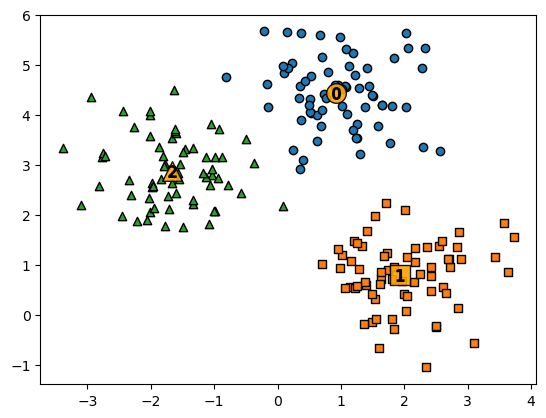

In [13]:
# 3개 군집 시각화
import matplotlib.pyplot as plt
%matplotlib inline

cluster_df['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','x','*']


for label in unique_labels:
    label_cluster = cluster_df[cluster_df['meanshift_label'] == label]
    center_x_y = centers[label]
    
    #군집별 산점도 표현
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],edgecolor='k',
                marker = markers[label])
    #군집별 중심 표현
    plt.scatter(x=center_x_y[0], y = center_x_y[1], s=200, color = 'orange',
                alpha = 0.9, edgecolor = 'k', marker = markers[label])
    plt.scatter(x=center_x_y[0], y = center_x_y[1], s=70, color = 'k',
                edgecolors='k', marker='$%d$' % label)
    
plt.show()


In [14]:
cluster_df.groupby('target')['meanshift_label'].value_counts()

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64